In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"/content/Toddler_Autism_dataset_July_2018.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [ ]:
df = df.rename(columns = {'Class/ASD Traits ' : 'ASD'})
df = df.rename(columns = {'A1' : 'Q1'})
df = df.rename(columns = {'A2' : 'Q2'})
df = df.rename(columns = {'A3' : 'Q3'})
df = df.rename(columns = {'A4' : 'Q4'})
df = df.rename(columns = {'A5' : 'Q5'})
df = df.rename(columns = {'A6' : 'Q6'})
df = df.rename(columns = {'A7' : 'Q7'})
df = df.rename(columns = {'A8' : 'Q8'})
df = df.rename(columns = {'A9' : 'Q9'})
df = df.rename(columns = {'A10' : 'Q10'})
df = df.rename(columns = {'Age_Mons' : 'Age in Months'})
df = df.rename(columns = {'Sex' : 'Gender'})
df = df.rename(columns = {'Qchat-10-Score' : 'Score out of 10'})
df = df.rename(columns = {'Ethnicity' : 'Region'})
df

,Case_No,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Age in Months,Score out of 10,Gender,Region,Jaundice,Family_mem_with_ASD,Who completed the test,ASD
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
x = df.drop('Case_No' , axis = 1)
x = x.drop('ASD', axis = 1)
y = df['ASD']

In [ ]:
x.shape, y.shape

((1054, 17), (1054,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 36)

In [ ]:
obj_cols = x_train.select_dtypes(include = 'object').columns
obj_cols

Index(['Gender', 'Region', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test'],
      dtype='object')

In [ ]:
float_cols = x_train.select_dtypes(include = 'int64').columns
float_cols

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Age in Months', 'Score out of 10'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y_train)

LabelEncoder()

In [ ]:
y_train_processed = le.transform(y_train)
y_test_processed = le.transform(y_test)

In [ ]:
y_train_processed

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [x_train[i].unique() for i in obj_cols])
oe.fit(x_train[obj_cols])
x_train_cat_encoded = oe.transform(x_train[obj_cols])
x_test_cat_encoded = oe.transform(x_test[obj_cols])

In [ ]:
x_train_cat_encoded

array([[0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train[float_cols])

x_train_float_encoded = scaler.transform(x_train[float_cols])
x_test_float_encoded = scaler.transform(x_test[float_cols])

In [ ]:
x_train_float_encoded

array([[0.        , 1.        , 0.        , ..., 1.        , 0.70833333,
        0.5       ],
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.8       ],
       [1.        , 1.        , 0.        , ..., 1.        , 0.125     ,
        0.7       ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.4       ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.75      ,
        0.6       ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.5       ,
        0.5       ]])

In [ ]:
x_train_processed = np.hstack((x_train_cat_encoded, x_train_float_encoded))
x_test_processed = np.hstack((x_test_cat_encoded, x_test_float_encoded))

In [ ]:
feature_names = np.concatenate([obj_cols, float_cols])

In [ ]:
x_train_final = pd.DataFrame(x_train_processed, columns = feature_names)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_processed, y_train_processed)
y_pred = lr.predict(x_test_processed)
print(accuracy_score(y_test_processed, y_pred))
print(confusion_matrix(y_test_processed, y_pred))

1.0
[[ 66   0]
 [  0 145]]


In [ ]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [ ]:
df2 = pd.read_csv(r"/content/Sample_Dataset.csv")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_No                 10 non-null     float64
 1   Reaction_Time           10 non-null     float64
 2   Accuracy_Rate           10 non-null     float64
 3   Q1                      10 non-null     float64
 4   Q3                      10 non-null     float64
 5   Q5                      10 non-null     float64
 6   Q7                      10 non-null     float64
 7   Q9                      10 non-null     float64
 8   Q10                     10 non-null     float64
 9   Age in Months           11 non-null     int64  
 10  Gender                  11 non-null     object 
 11  Region                  11 non-null     object 
 12  Jaundice                11 non-null     object 
 13  Family_mem_with_ASD     11 non-null     object 
 14  Who completed the test  11 non-null     obje

In [ ]:
def predict_q2(reaction_time, accuracy_rate):
    return 1 if reaction_time >= 2500.0 and accuracy_rate < 70.0 else 0

def predict_q4(reaction_time, accuracy_rate):
    return 1 if reaction_time >= 2200.0 and accuracy_rate < 78.0 else 0

def predict_q6(reaction_time, accuracy_rate):
    return 1 if reaction_time >= 2000.0 and accuracy_rate < 75.0 else 0

def predict_q8(reaction_time, accuracy_rate):
    return 1 if reaction_time >= 1800.0 and accuracy_rate < 80.0 else 0

In [ ]:
df2['Q2'] = df2.apply(lambda row: predict_q2(row['Reaction_Time'], row['Accuracy_Rate']), axis=1)
df2['Q4'] = df2.apply(lambda row: predict_q4(row['Reaction_Time'], row['Accuracy_Rate']), axis=1)
df2['Q6'] = df2.apply(lambda row: predict_q6(row['Reaction_Time'], row['Accuracy_Rate']), axis=1)
df2['Q8'] = df2.apply(lambda row: predict_q8(row['Reaction_Time'], row['Accuracy_Rate']), axis=1)
df2['Score out of 10'] = df2[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']].sum(axis=1)

In [ ]:
cols = ['Q1',  'Q3',  'Q5',  'Q7',  'Q9', 'Q10', 'Score out of 10']
df2[cols] = df2[cols].applymap(np.int64)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_No                 10 non-null     float64
 1   Reaction_Time           10 non-null     float64
 2   Accuracy_Rate           10 non-null     float64
 3   Q1                      10 non-null     int64  
 4   Q3                      10 non-null     int64  
 5   Q5                      10 non-null     int64  
 6   Q7                      10 non-null     int64  
 7   Q9                      10 non-null     int64  
 8   Q10                     10 non-null     int64  
 9   Age in Months           10 non-null     int64  
 10  Gender                  10 non-null     object 
 11  Region                  10 non-null     object 
 12  Jaundice                10 non-null     object 
 13  Family_mem_with_ASD     10 non-null     object 
 14  Who completed the test  10 non-null     objec

In [ ]:
X = df2.drop('Case_No' , axis = 1)
X = df2.drop('Reaction_Time' , axis = 1)
X = df2.drop('Accuracy_Rate' , axis = 1)

In [ ]:
obj_cols2 = X.select_dtypes(include = 'object').columns
obj_cols2

Index(['Gender', 'Region', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test'],
      dtype='object')

In [ ]:
float_cols2 = X.select_dtypes(include = 'int64').columns
float_cols2

Index(['Q1', 'Q3', 'Q5', 'Q7', 'Q9', 'Q10', 'Age in Months', 'Q2', 'Q4', 'Q6',
       'Q8', 'Score out of 10'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [X[i].unique() for i in obj_cols2])
oe.fit(X[obj_cols2])
X_cat_encoded = oe.transform(X[obj_cols2])

In [ ]:
X_cat_encoded

array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 1., 0., 2., 0.],
       [0., 0., 1., 1., 0.]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[float_cols2])

X_float_encoded = scaler.transform(X[float_cols2])

In [ ]:
X_processed = np.hstack((X_cat_encoded, X_float_encoded))

In [ ]:
feature_names2 = np.concatenate([obj_cols2, float_cols2])

In [ ]:
X_final = pd.DataFrame(X_processed, columns = feature_names2)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_processed, y_train_processed)
y_pred = lr.predict(X_processed)

In [ ]:
print("ASD Possible : ", y_pred)

ASD Possible :  [0 1 0 0 0 1 0 1 0 1]


In [ ]:
import csv

In [ ]:
cases = list(range(1, len(y_pred) + 1))
predictions = [{'Case': i, 'ASD_Present': "Chances" if pred == 1 else "No"} for i, pred in zip(cases, y_pred)]

In [ ]:
csv_file = 'predictions.csv'

In [ ]:
with open(csv_file, 'w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['Case', 'ASD_Present'])
    writer.writeheader()
    writer.writerows(predictions)

In [ ]:
print(f"Predictions saved to '{csv_file}' successfully.")

Predictions saved to 'predictions.csv' successfully.


In [65]:
df2['ASD_Prediction'] = y_pred

In [66]:
asd_present = df2[df2['ASD_Prediction'] == 1]
asd_not_present = df2[df2['ASD_Prediction'] == 0]

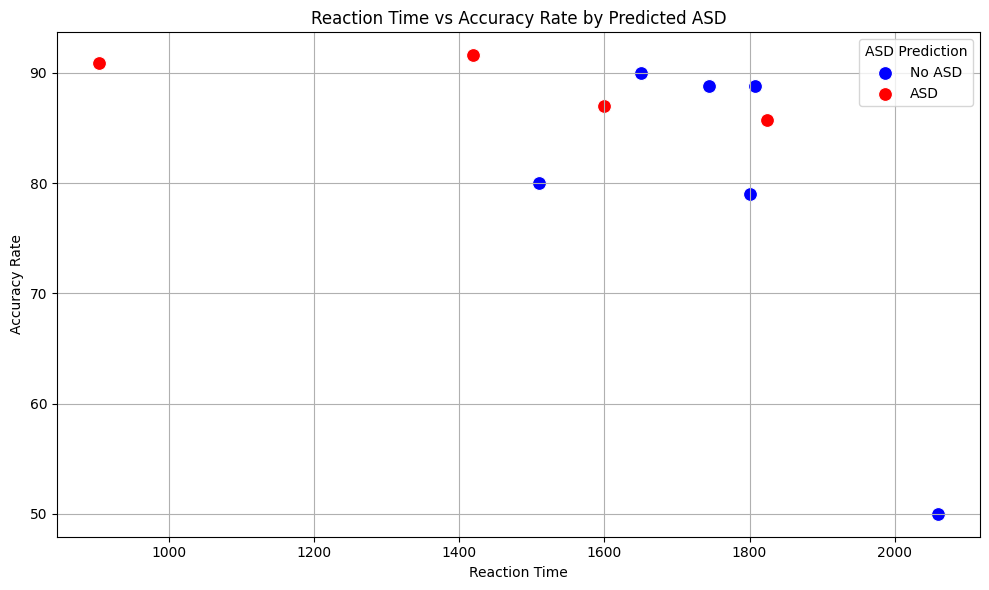

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reaction_Time', y='Accuracy_Rate', data=asd_not_present, color='blue', label='No ASD', s=100)
sns.scatterplot(x='Reaction_Time', y='Accuracy_Rate', data=asd_present, color='red', label='ASD', s=100)

plt.title('Reaction Time vs Accuracy Rate by Predicted ASD')
plt.xlabel('Reaction Time')
plt.ylabel('Accuracy Rate')
plt.legend(title='ASD Prediction')

plt.grid(True)
plt.tight_layout()
plt.show()